## Naiive Bayes Theory 두 확률변수가 있을때 사전, 사후 확률에 대한 관계
### 결과에 대한 확률 추정 / 여러 속성 정보를 고려
나이브 베이즈는 분류기를 만들 수 있는 간단한 기술로써 단일 알고리즘을 통한 훈련이 아닌 일반적인 원칙에 근거한 여러 알고리즘들을 이용하여 
훈련된다. 모든 나이브 베이즈 분류기는 공통적으로 모든 특성 값은 서로 독립임을 가정한다. 
예를 들어, 특정 과일을 사과로 분류 가능하게 하는 특성들 (둥글다, 빨갛다, 지름 10cm)은 나이브 베이즈 분류기에서 특성들 사이에서 발생할 수 
있는 연관성이 없음을 가정하고 각각의 특성들이 특정 과일이 사과일 확률에 독립적으로 기여 하는 것으로 간주한다.
나이브 베이즈의 장점은 다음과 같다. 첫째, 일부의 확률 모델에서 나이브 베이즈 분류는 지도 학습 (Supervised Learning) 환경에서 매우 
효율적으로 훈련 될 수 있다. 많은 실제 응용에서, 나이브 베이즈 모델의 파라미터 추정은 최대우도방법 (Maximum Likelihood Estimation (MLE))을 
사용하며, 베이즈 확률론이나 베이지안 방법들은 이용하지 않고도 훈련이 가능하다. 둘째, 분류에 필요한 파라미터를 추정하기 위한 트레이닝 
데이터의 양이 매우 적다는 것이다. 셋째, 간단한 디자인과 단순한 가정에도 불구하고, 나이브 베이즈 분류는 많은 복잡한 실제 상황에서 잘 
작동한다. 2004 년의 한 분석[3]은 나이브 베이즈 분류의 이러한 능력에 명확한 이론적인 이유가 있음을 보여 주었다. 
또한 2006 년에는 다른 분류 알고리즘과의 포괄적인 비교를 통하여 베이지안 분류는 부스트 트리 또는 랜덤 포레스트와 같은 다른 접근 방식을 
넘어섰다는 것이 밝혀졌다

### IDS 침입탐지시스템 (비정상적 행위 여부 판단)
- 침입차단 : 비허가 출입금지
- 침입탐지 : 네트워크 내부에서의 이상행동 검출

### 질병진단 (사전 사후 확률적 접근 : 관찰증상 기반)
- 질병에 걸리기 전과 후의 증상구분

### 사건에 대한 우도(likelihood)는 여러 시행에서 이용할 수 있다는 것을 기반으로 추정해야 한다.

- 시행 : 동전 던지기
- 사건(결과) : 앞면 / 뒷면에 나온 결과. 시행에 따른 결과
- 확률 : 특정사건이 발생한 시행 수를 전체 시행의 수로 나눈 것.

#### 오늘 비가 올 확률 ?  - 과거의 데이터로부터 오늘의 날씨 속성과 유사한 과거의 날들 중 비가온 날을 유사한 날의 수로 나눈것.


- 베이즈 정리
$${\displaystyle P(A_{1}|B)={\frac {P(B\cap A_{1})}{P(B)}}}$$

    $$= {\displaystyle {\frac {P(B|A_{1})P(A_{1})}{P(B)}}}$$

    $$= {\displaystyle {\frac {P(B|A_{1})P(A_{1})}{P(B|A_{1})P(A_{1})+P(B|A_{2})P(A_{2})}}}$$

- 사건 A의 확률 P(A) summation p()=1
- p(A|B) = 상호배타적

트레이닝데이터 / 테스트데이터
우도표 : 메일에 등장하는 단어 전체
스팸메일과 햄메일 의 가능성을 구하고 비교

In [1]:
smsraw<-read.csv("rexp/sms_spam_ansi.txt",stringsAsFactors = FALSE)
str(smsraw)

'data.frame':	5559 obs. of  2 variables:
 $ type: chr  "ham" "ham" "ham" "spam" ...
 $ text: chr  "Hope you are having a good week. Just checking in" "K..give back my thanks." "Am also doing in cbe only. But have to pay." "complimentary 4 STAR Ibiza Holiday or ￡10,000 cash needs your URGENT collection. 09066364349 NOW from Landline"| __truncated__ ...


In [2]:
smsraw$type<-factor(smsraw$type)
str(smsraw)
table(smsraw$type)

'data.frame':	5559 obs. of  2 variables:
 $ type: Factor w/ 2 levels "ham","spam": 1 1 1 2 2 1 1 1 2 1 ...
 $ text: chr  "Hope you are having a good week. Just checking in" "K..give back my thanks." "Am also doing in cbe only. But have to pay." "complimentary 4 STAR Ibiza Holiday or ￡10,000 cash needs your URGENT collection. 09066364349 NOW from Landline"| __truncated__ ...



 ham spam 
4812  747 

In [3]:
library(tm)
smsCorpus <- VCorpus(VectorSource(smsraw$text))
smsCorpus # 메모리공간점유

Warning message:
"package 'tm' was built under R version 4.0.2"
Loading required package: NLP



<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5559

In [4]:
smsCorpus[[1]]$content # 내용보기

[1] "Hope you are having a good week. Just checking in"

In [5]:
print(as.character(smsCorpus[[1]]))
print(lapply(smsCorpus[1], as.character))

[1] "Hope you are having a good week. Just checking in"
$`1`
[1] "Hope you are having a good week. Just checking in"



In [6]:
corpusClean <- tm_map(smsCorpus, content_transformer(tolower))

In [7]:
corpusClean[[1]]$content

[1] "hope you are having a good week. just checking in"

In [8]:
# 코퍼스에 있는 모든 숫자 제거
corpusClean<-tm_map(corpusClean, content_transformer(removeNumbers))
corpusClean[[4]]$content

[1] "complimentary  star ibiza holiday or ￡, cash needs your urgent collection.  now from landline not to lose out! boxskwpppm+"

In [9]:
#content_transformer를 포함하고 있는 몇몇 함수들도 있음.
corpusClean<-tm_map(corpusClean,removeNumbers)

In [10]:
# stopwords 제거
stopwords()

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [11]:
# 메일 내에서 불용어 처리니까 메일 수는 안줄지
corpusClean <- tm_map(corpusClean, removeWords, stopwords())
corpusClean

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5559

In [12]:
x = c("They", "Are") # 사용자 정의 벡터사전 
tm_map(corpusClean, removeWords, x)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5559

In [13]:
corpusClean[[4]]$content

[1] "complimentary  star ibiza holiday  ￡, cash needs  urgent collection.  now  landline   lose ! boxskwpppm+"

In [14]:
# 파운드도 제거하려면 불용어에 넣었어야 함 ><뀨잉
corpusClean <- tm_map(corpusClean, removePunctuation)
corpusClean[[4]]$content

[1] "complimentary  star ibiza holiday  ￡ cash needs  urgent collection  now  landline   lose  boxskwpppm"

In [15]:
corpusClean[[2]]$content

[1] "kgive back  thanks"

In [16]:
removePunctuation("Hello...........world!")

[1] "Helloworld"

In [17]:
myremPunc <- function(x){
    gsub("[[:punct:]]+"," ",x)
}
myremPunc("hello..........world")

[1] "hello world"

In [18]:
library(SnowballC)

In [19]:
wordStem(c("learn", "learned","learning","learns"))

[1] "learn" "learn" "learn" "learn"

In [20]:
corpusClean <- tm_map(corpusClean, stemDocument)
corpusClean

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 5559

In [21]:
corpusClean[[2]]$content

[1] "kgive back thank"

In [22]:
corpusClean <- tm_map(corpusClean, stripWhitespace)

In [23]:
lapply(corpusClean[1:5], as.character)

$`1`
[1] "hope good week just check"

$`2`
[1] "kgive back thank"

$`3`
[1] "also cbe pay"

$`4`
[1] "complimentari star ibiza holiday ￡ cash need urgent collect now landlin lose boxskwpppm"

$`5`
[1] "okmail dear dave final notic collect tenerif holiday cash award call landlin tcs sae box cwwx ppm"

In [25]:
smsDtm <- DocumentTermMatrix(corpusClean)
smsDtm

<<DocumentTermMatrix (documents: 5559, terms: 6557)>>
Non-/sparse entries: 42136/36408227
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [26]:
smsDtm2 <- DocumentTermMatrix(smsCorpus, control = list(
    tolower=TRUE, removeNumbers=TRUE, stopwords = TRUE, removePunctuation = TRUE, stemming=TRUE
))
smsDtm2

<<DocumentTermMatrix (documents: 5559, terms: 6961)>>
Non-/sparse entries: 43221/38652978
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [27]:
smsDtm3 <- DocumentTermMatrix(smsCorpus, control = list(
    tolower=TRUE, removeNumbers=TRUE, stopwords = function(x){removeWords(x,stopwords())}, removePunctuation = TRUE, stemming=TRUE
))
smsDtm3

<<DocumentTermMatrix (documents: 5559, terms: 6557)>>
Non-/sparse entries: 42136/36408227
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [48]:
smsDtmTrain <- smsDtm[1:4169,]
smsDtmTest <- smsDtm[4170:5559,]

In [49]:
smsTrainLabels <- smsraw[1:4169,]$type
smsTestLabels <- smsraw[4170:5559,]$type

In [30]:
smsTrainLabels

[1] ham  ham  ham  spam spam ham  ham  ham  spam ham  ham  ham  ham  ham 
  [15] ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham 
  [29] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  spam ham  ham  ham 
  [43] ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
  [57] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
  [71] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam spam ham 
  [85] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham 
  [99] ham  spam spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [113] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [127] ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham 
 [141] ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham 
 [155] ham  ham  ham  ham  spam ham  ham  ham  ham  spam ham  spam ham  ham 
 [169] ham  ham  spam ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [183] ham  ham  ham  ham  spam spam ham  ham  ham  ham  ham  ham  ham  spam
 [197] ham  ham  ham  spam spam ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [211] ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham 
 [225] ham  ham  ham  ham  ham  spam ham  spam ham  ham  spam ham  ham  ham 
 [239] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam spam ham 
 [253] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [267] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham 
 [281] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [295] ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  spam
 [309] ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham 
 [323] ham  ham  ham  ham  ham  spam ham  ham  ham  ham  spam spam ham  ham 
 [337] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [351] ham  ham  ham  spam ham  ham  spam ham  spam spam ham  ham  ham  ham 
 [365] spam ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham 
 [379] ham  ham  ham  ham  ham  ham  spam ham  ham  spam ham  ham  ham  ham 
 [393] spam ham  ham  ham  ham  ham  ham  spam ham  spam ham  ham  ham  ham 
 [407] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [421] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [435] ham  spam spam ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham 
 [449] spam spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham 
 [463] ham  ham  spam spam ham  ham  spam ham  ham  ham  ham  ham  spam ham 
 [477] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [491] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham 
 [505] ham  ham  spam ham  ham  ham  ham  ham  ham  spam spam ham  ham  ham 
 [519] spam spam ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham 
 [533] ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham 
 [547] ham  ham  ham  ham  ham  ham  ham  spam ham  spam ham  ham  ham  ham 
 [561] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [575] ham  ham  spam ham  ham  ham  spam ham  ham  spam ham  ham  spam ham 
 [589] ham  spam ham  ham  spam ham  spam ham  ham  ham  ham  ham  spam ham 
 [603] ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  spam spam
 [617] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham 
 [631] ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham 
 [645] ham  ham  ham  ham  spam spam ham  ham  ham  spam ham  ham  ham  ham 
 [659] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [673] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [687] spam ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [701] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  spam ham  ham  ham 
 [715] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham 

In [31]:
prop.table(table(smsTrainLabels))
prop.table(table(smsTestLabels))

smsTrainLabels
      ham      spam 
0.8647158 0.1352842 

smsTestLabels
      ham      spam 
0.8683453 0.1316547 

In [34]:
library(wordcloud)

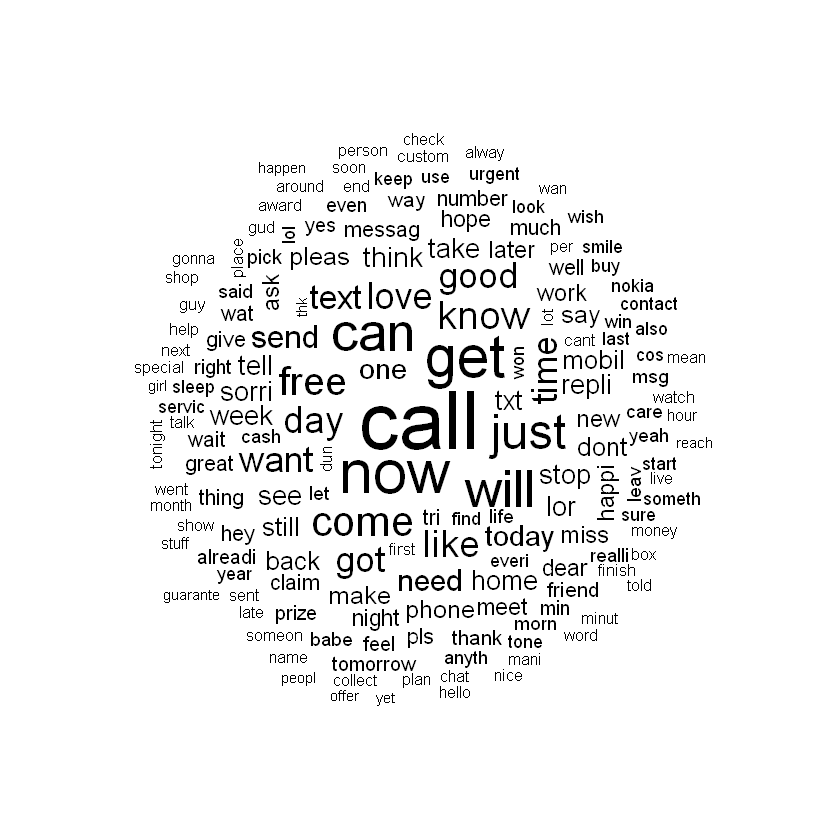

In [35]:
# 전체 메일에서 등장하는 단어 중 가장 
wordcloud(corpusClean, min.freq=50, random.order=FALSE)

In [36]:
spam <- subset(smsraw, type='spam')
ham <- subset(smsraw, type='ham')

In [37]:
blue <- brewer.pal(9, "Paired")

Warning message in tm_map.SimpleCorpus(corpus, tm::removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, function(x) tm::removeWords(x, tm::stopwords())):
"transformation drops documents"


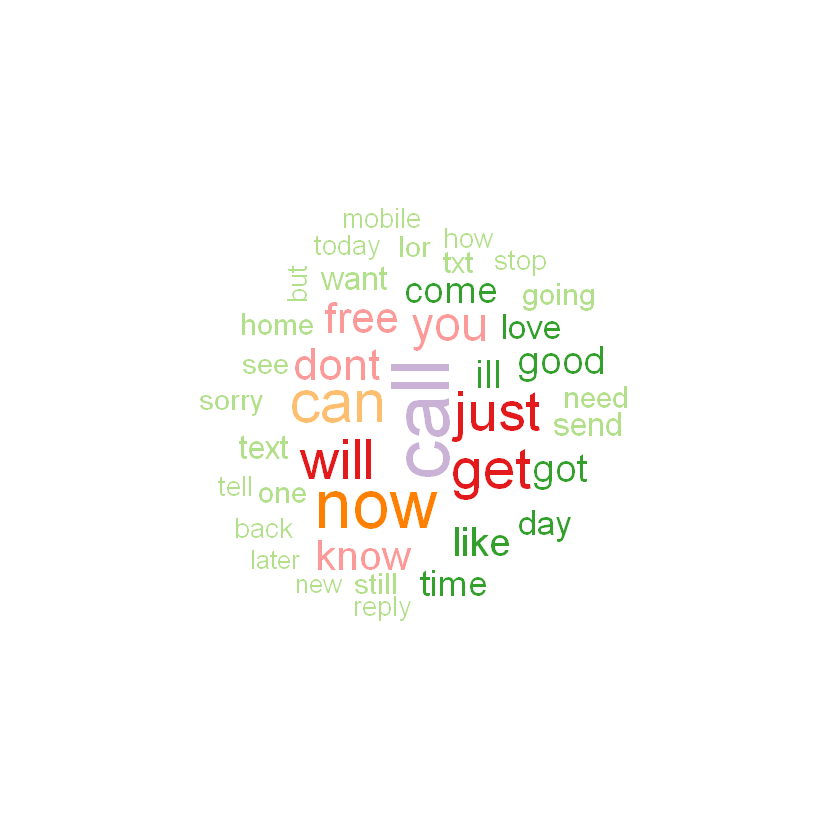

In [38]:
wordcloud(spam$text, max.words=40, random.order=FALSE, colors=blue)

In [50]:
# 베이지안 필터기 (5번 미만 등장 단어는 제외)
# 5500개 문서에서 5번 미만 (0.5%)

smsFreqWords <- findFreqTerms(smsDtmTrain,5)

In [75]:
smsPredWords <- findFreqTerms(smsDtmTest,5)

In [57]:
smsDtmFreqTrain<-removeSparseTerms(smsDtmTrain, 0.999)
smsDtmFreqTrain

<<DocumentTermMatrix (documents: 4169, terms: 1102)>>
Non-/sparse entries: 24817/4569421
Sparsity           : 99%
Maximal term length: 19
Weighting          : term frequency (tf)

In [76]:
smsDtmPredTrain<-removeSparseTerms(smsDtmTest, 0.999)
smsDtmPredTrain

<<DocumentTermMatrix (documents: 1390, terms: 1266)>>
Non-/sparse entries: 8788/1750952
Sparsity           : 100%
Maximal term length: 27
Weighting          : term frequency (tf)

In [54]:
str(smsFreqWords)

 chr [1:1137] "￡wk" "abiola" "abl" "abt" "accept" "access" "account" ...


In [77]:
str(smsPredWords)

 chr [1:485] "abl" "abt" "account" "actual" "address" "afternoon" "age" ...


In [80]:
smsDtmFreqTrain <- smsDtmTrain[,smsFreqWords]
smsDtmFreqTest <-smsDtmTest[,smsFreqWords]

In [90]:
smsDtmPredTest<- smsDtmTest[,smsPredWords]
smsDtmPredTrain <-smsDtmTrain[,smsPredWords]

In [81]:
convertCounts <- function(x){s<-ifelse}(x>0, "Yes","NO")

In [91]:
smsTest <- apply(smsDtmPredTest, MARGIN=2, convertCounts)

In [83]:
smsTrain <- apply(smsDtmFreqTrain, MARGIN=2, convertCounts)

In [84]:
smsDtmFreqTrain

<<DocumentTermMatrix (documents: 4169, terms: 1137)>>
Non-/sparse entries: 24940/4715213
Sparsity           : 99%
Maximal term length: 19
Weighting          : term frequency (tf)

In [92]:
smsDtmPredTest

<<DocumentTermMatrix (documents: 1390, terms: 485)>>
Non-/sparse entries: 6768/667382
Sparsity           : 99%
Maximal term length: 10
Weighting          : term frequency (tf)

In [85]:
print(smsTrain[[1]])
print(smsTrain[1,])

[1] "NO"
               ￡wk              abiola                 abl                 abt 
               "NO"                "NO"                "NO"                "NO" 
             accept              access             account              across 
               "NO"                "NO"                "NO"                "NO" 
                act               activ              actual                 add 
               "NO"                "NO"                "NO"                "NO" 
            address               admir               adult              advanc 
               "NO"                "NO"                "NO"                "NO" 
                aft           afternoon                 age                 ago 
               "NO"                "NO"                "NO"                "NO" 
                aha               ahead               aight                aint 
               "NO"                "NO"                "NO"                "NO" 
                air 

In [86]:
smsTrain[4000,]

￡wk              abiola                 abl                 abt 
               "NO"                "NO"                "NO"                "NO" 
             accept              access             account              across 
               "NO"                "NO"                "NO"                "NO" 
                act               activ              actual                 add 
               "NO"                "NO"                "NO"                "NO" 
            address               admir               adult              advanc 
               "NO"                "NO"                "NO"                "NO" 
                aft           afternoon                 age                 ago 
               "NO"                "NO"                "NO"                "NO" 
                aha               ahead               aight                aint 
               "NO"                "NO"                "NO"                "NO" 
                air                aiyo                alex              almost 
               "NO"                "NO"                "NO"                "NO" 
               alon             alreadi             alright                also 
               "NO"                "NO"                "NO"                "NO" 
              alway               angri             announc               anoth 
               "NO"                "NO"                "NO"                "NO" 
             answer              anymor               anyon               anyth 
               "NO"                "NO"                "NO"                "NO" 
             anytim              anyway               apart                 app 
               "NO"                "NO"                "NO"                "NO" 
              appli             appreci               arcad                 ard 
               "NO"                "NO"                "NO"                "NO" 
               area                argu            argument              armand 
               "NO"                "NO"                "NO"                "NO" 
             around              arrang               arriv                asap 
               "NO"                "NO"                "NO"                "NO" 
                ask                askd             attempt             auction 
               "NO"                "NO"                "NO"                "NO" 
              avail                 ave               avoid               await 
               "NO"                "NO"                "NO"                "NO" 
               awak               award                away              awesom 
               "NO"                "NO"                "NO"                "NO" 
               babe                babi                back                 bad 
               "NO"                "NO"                "NO"                "NO" 
                bag                bank                bare               basic 
               "NO"                "NO"                "NO"                "NO" 
               bath             batteri                bcoz                bday 
               "NO"                "NO"                "NO"                "NO" 
             beauti               becom                 bed             bedroom 
               "NO"                "NO"                "NO"                "NO" 
               beer               begin              believ                best 
               "NO"                "NO"                "NO"                "NO" 
             better                 bid                 big                bill 
               "NO"                "NO"                "NO"                "NO" 
               bird            birthday                 bit               black 
               "NO"                "NO"                "NO"                "NO" 
              blank               bless                blue           bluetooth 
               "NO"                "NO"        

5500개 되는 전체메일 중 특수문자, 어휘 어근형태 추출, 불용어 제거 등 전처리작업
1100개로 대폭 축소 : 5회 이상 등장 단어만 남겼음
DTM을 만들었다는데 그 과정 뭔말인지 하나도 못알아 들었음. 기존 DTM 은 횟수로 저장됨
단어등장 여부를 매트릭스에 저장 하는데 Y/N로 저장해서 두개의 범주로 count될 수 있도록 간편화 
이 모델을 가지고 테스트데이터를 ... 어쩐다고?

In [87]:
# 모델 만들기 - 나이브베이즈분류기 구현
library(e1071)

In [88]:
smsClassifier<-naiveBayes(smsTrain,smsTrainLabels)
smsClassifier


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = smsTrain, y = smsTrainLabels)

A-priori probabilities:
smsTrainLabels
      ham      spam 
0.8647158 0.1352842 

Conditional probabilities:
              ￡wk
smsTrainLabels          NO         Yes
          ham  1.000000000 0.000000000
          spam 0.991134752 0.008865248

              abiola
smsTrainLabels          NO         Yes
          ham  0.998058252 0.001941748
          spam 1.000000000 0.000000000

              abl
smsTrainLabels          NO         Yes
          ham  0.994729542 0.005270458
          spam 1.000000000 0.000000000

              abt
smsTrainLabels          NO         Yes
          ham  0.995839112 0.004160888
          spam 1.000000000 0.000000000

              accept
smsTrainLabels          NO         Yes
          ham  0.998613037 0.001386963
          spam 1.000000000 0.000000000

              access
smsTrainLabels           NO          Yes
          ham  0.9997226075 0.0002

In [93]:
smsTestPred <- predict(smsClassifier, smsTest)
smsTestPred

[1] ham  ham  ham  ham  spam ham  ham  ham  ham  spam ham  ham  ham  spam
  [15] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
  [29] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  spam ham  ham 
  [43] ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham 
  [57] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
  [71] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham 
  [85] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
  [99] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam spam ham 
 [113] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [127] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham 
 [141] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  spam ham 
 [155] spam ham  ham  ham  spam ham  ham  ham  ham  ham  spam ham  ham  ham 
 [169] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham 
 [183] ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham 
 [197] ham  ham  ham  spam spam ham  ham  ham  ham  ham  ham  ham  ham  spam
 [211] ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham 
 [225] ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham 
 [239] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [253] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [267] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [281] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham 
 [295] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [309] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [323] ham  ham  ham  ham  ham  spam ham  spam ham  ham  ham  ham  ham  ham 
 [337] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  spam spam ham  ham 
 [351] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [365] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [379] spam ham  ham  ham  ham  spam ham  spam ham  ham  ham  ham  ham  ham 
 [393] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [407] ham  ham  spam ham  ham  ham  spam spam ham  ham  ham  ham  ham  ham 
 [421] spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [435] spam ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  spam
 [449] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [463] ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [477] ham  ham  spam ham  ham  ham  spam ham  ham  ham  ham  ham  ham  spam
 [491] ham  ham  ham  ham  ham  ham  spam ham  ham  spam spam spam ham  ham 
 [505] ham  ham  ham  ham  spam ham  ham  ham  ham  spam ham  ham  ham  ham 
 [519] ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham 
 [533] ham  ham  ham  spam ham  spam ham  ham  ham  ham  ham  ham  spam ham 
 [547] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [561] ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [575] ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [589] ham  spam ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham 
 [603] ham  ham  ham  ham  ham  spam ham  spam ham  ham  ham  ham  ham  ham 
 [617] ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  spam ham 
 [631] ham  ham  ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham 
 [645] ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham 
 [659] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 
 [673] ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham  ham  ham  spam
 [687] spam ham  ham  spam ham  ham  spam ham  ham  ham  ham  ham  ham  ham 
 [701] ham  ham  ham  ham  ham  ham  ham  spam ham  ham  ham  ham  ham  ham 
 [715] ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham  ham 

In [94]:
library(gmodels)

In [96]:
CrossTable(smsTestPred, smsTestLabels)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
             | smsTestLabels 
 smsTestPred |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1201 |        30 |      1231 | 
             |    16.317 |   107.620 |           | 
             |     0.976 |     0.024 |     0.886 | 
             |     0.995 |     0.164 |           | 
             |     0.864 |     0.022 |           | 
-------------|-----------|-----------|-----------|
        spam |         6 |       153 |       159 | 
             |   126.328 |   833.210 |           | 
             |     0.038 |     0.962 |     0.114 | 
             |     0.005 |     0.836 |           | 
             |     0.004 |     0.110 |           | 
-------------|-----------|-----------|

In [97]:
text <- c("You Have 3 new messages. Call 911.","Sent me ur email id soon.","We are trying to contack U.","Sorry. I'll call you later.")

In [98]:
as.matrix(text)

You Have 3 new messages. Call 911.
Sent me ur email id soon.
We are trying to contack U.
Sorry. I'll call you later.


In [99]:
cps <- Corpus(VectorSource(text))

In [100]:
tdm <- TermDocumentMatrix(cps)

In [102]:
freq <- as.matrix(tdm)

In [104]:
freqTest <- apply(freq, MARGIN=2, convertCounts)
freqTest

,1,2,3,4
911.,Yes,NO,NO,NO
call,Yes,NO,NO,Yes
have,Yes,NO,NO,NO
messages.,Yes,NO,NO,NO
new,Yes,NO,NO,NO
you,Yes,NO,NO,Yes
email,NO,Yes,NO,NO
sent,NO,Yes,NO,NO
soon.,NO,Yes,NO,NO
are,NO,NO,Yes,NO


In [106]:
TestPred <- predict(smsClassifier, freqTest)
TestPred

[1] ham ham ham ham ham ham ham ham ham ham ham ham ham ham ham
Levels: ham spam